%%html
<style>


  
.reveal pre code {
  font-size: 1.1em;
  line-height: 1.1;
}

.reveal pre {
  width: 120%;
  margin-left: -10%;
}


</style>

## Introduction to Machine Learning with Python

<div style="font-size:0.5em; line-height:0.5em">

Based on:

* https://medium.com/simple-ai/decision-tree-learning-intro-to-machine-learning-2-8592720a739e


* A.C. Muller, S. Guido, Introduction to Machine Learning with Python, O'Reilly. 2016


Python library for ML: **scikit-learn**

https://scikit-learn.org/


</div>

#### Iris

<div style="font-size:0.5em; line-height:0.5em">

"Let’s assume that a hobby botanist is interested in distinguishing the species of some
iris flowers that she has found. She has collected some measurements associated with
each iris: the length and width of the petals and the length and width of the sepals, all
measured in centimeters


She also has the measurements of some irises that have been previously identified by
an expert botanist as belonging to the species setosa, versicolor, or virginica. For these
measurements, she can be certain of which species each iris belongs to. Let’s assume
that these are the only species our hobby botanist will encounter in the wild.

Our goal is to build a machine learning model that can learn from the measurements
of these irises whose species is known, so that we can predict the species for a new
iris." 

*A.C. Muller, S. Guido, Introduction to Machine Learning with Python, O'Reilly. 2016*


**This is a supervised learning problem.**

</div>

<div style="font-size:0.5em; line-height:0.5em">

Learning algorithms

 * Y= f(X), X features, Y output, f is the target function
 * we don't know f, but we want to predict Y, given X
 
 *Input*:  set of training examples
 *Output*:  a function h:X->Y that best approximates f
 
 
 
 In our example:
 
 * the features: *sepal length*, *sepal width*, *petal length*, *petal width*
 * the targets (labels): **setosa**, **versicolor**, **virginica**

 </div>

#### Data

In [83]:
#Data
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

iris = load_iris()
print(format(iris.keys()))


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [84]:
features = iris.feature_names
print(features)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [85]:
target_names = iris.target_names
print(target_names)

['setosa' 'versicolor' 'virginica']


In [86]:
X = iris.data
print("Type of X is ", type(X), "and shape of X is ",X.shape)
print(X[[1,50,45,100]])

Type of X is  <class 'numpy.ndarray'> and shape of X is  (150, 4)
[[4.9 3.  1.4 0.2]
 [7.  3.2 4.7 1.4]
 [4.8 3.  1.4 0.3]
 [6.3 3.3 6.  2.5]]


In [87]:
y=iris.target
print("Type of Y is ", type(y), "and shape of y is ",y.shape)
print(y[[1,50,45,100]]) # selection 
 
# target_names are represented as 0,1,2


Type of Y is  <class 'numpy.ndarray'> and shape of y is  (150,)
[0 1 0 2]


<div style="font-size:0.5em; line-height:0.5em">

* the above examples give us infos about the records 1, 50, 45, 100:
  + for records 1 and 45  the target value is 0 the label is `setosa`

</div>

In [88]:
# inspect the data with a scatter plot
#https://seaborn.pydata.org/examples/scatterplot_matrix.html

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


sns.set(style="ticks")

df = sns.load_dataset("iris") #data set
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


#### Training and test data

<div style="font-size:0.5em; line-height:0.5em">

We have to split the data in *training data* and *test data*.


In the following:

`X_train` and `y_train` are the *training data* 


`X_test` and `y_test` are the *test data* 


</div>

In [89]:
test_idx = [0,1,50,51,100,101]

X_train = np.delete(iris.data,test_idx,axis=0)
y_train = np.delete(iris.target, test_idx)

X_test = X[test_idx]
y_test = y[test_idx]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(144, 4) (6, 4)
(144,) (6,)


In [90]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(iris.data, iris.target, random_state=0)

# 25% sunt date de test

print(X_train1.shape, X_test1.shape)
print(y_train1.shape, y_test1.shape)

(112, 4) (38, 4)
(112,) (38,)


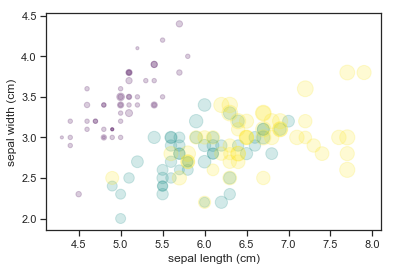

In [91]:
# inspect the data with a scatter plot
import matplotlib.pyplot as plt
v = iris.data.T
plt.scatter(v[0], v[1], alpha=0.2,
            s=100*v[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

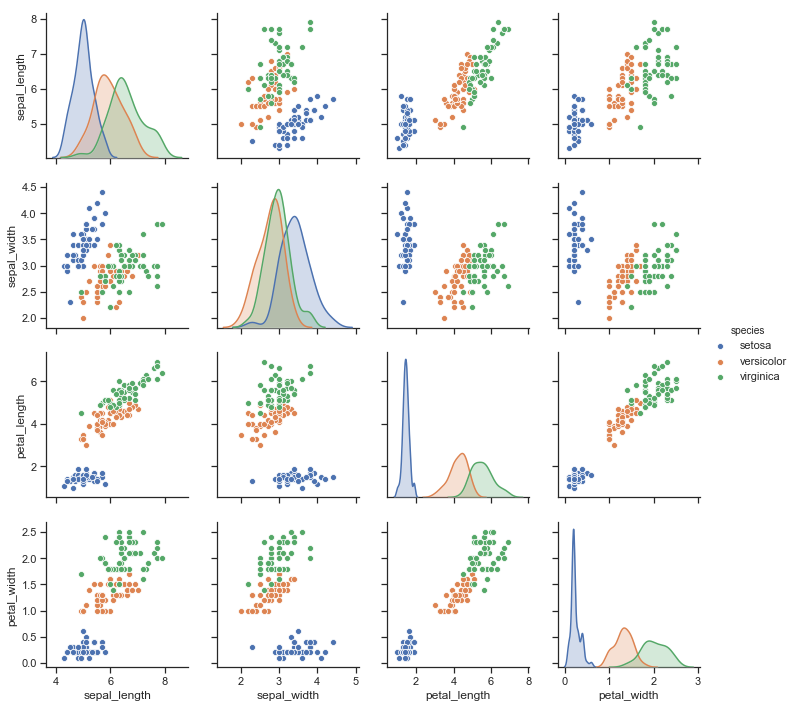

In [92]:
sns.pairplot(df, hue="species") #hue = Variable in data to map plot aspects to different colors.

#### Building the model

<div style="font-size:0.5em; line-height:0.5em">

We use the following classification algorithms for supervised learning:

* Decision Tree

* k-nearest neighbors 

</div>

In [93]:
# Classification algorithm: Decision Tree

from sklearn import tree
clfDT = tree.DecisionTreeClassifier()
clfDT.fit(X_train,y_train)

# see the tree here: 
# https://github.com/davidfumo/intro-to-machine-learning/blob/master/decision%20trees/iris.pdf

y_predict = clfDT.predict(X_test)
print(y_predict)
print(y_test)
print(clfDT.score(X_test, y_test))

[0 0 1 1 2 2]
[0 0 1 1 2 2]
1.0


In [94]:
#clfDT1 = tree.DecisionTreeClassifier()

clfDT.fit(X_train1,y_train1)

y_predict1 = clfDT.predict(X_test1)
print(y_predict1)
print(y_test1)
print(clfDT.score(X_test1, y_test1))

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]
0.9736842105263158


In [ ]:
# Classifier algorithm: k-nearest neighbors 


from sklearn.neighbors import KNeighborsClassifier
clfKN = KNeighborsClassifier(n_neighbors=1)
clfKN.fit(X_train,y_train)

y_predict = clfKN.predict(X_test)
print(y_predict)
print(y_test)
print(clfKN.score(X_test, y_test))

In [ ]:

clfKN.fit(X_train1,y_train1)

y_predict1 = clfKN.predict(X_test1)
print(y_predict1)
print(y_test1)
print(clfKN.score(X_test1, y_test1))

### Predictions

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
predictionDT = clfDT.predict(X_new)
print("Predicted target name with DT is ", iris.target_names[predictionDT])
predictionKN = clfKN.predict(X_new)
print("Predicted target name with KN is ", iris.target_names[predictionKN])

### End